In [1]:
import pandas as pd
import numpy as np
import re

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
import requests
import json
from urllib.request import urlretrieve
from bs4 import BeautifulSoup
from collections import defaultdict

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Wikipedia article available here: https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900

In [3]:
earthquakes = pd.read_csv('../data/earthquakes_wikitable.csv')
earthquakes

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2011-03-24 20:25,Burma (see 2011 Burma earthquake),NaN,NaN,NaN,6.8 Mw,NaN,NaN,NaN,NaN,NaN,150+
1336,2011-04-07 14:32,Japan (see April 2011 Miyagi earthquake),38.2,140.0,66.0,7.1 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1337,2011-09-18 12:40,India (see 2011 Sikkim earthquake),27.723,88.064,19.7,6.9 Mw,L,NaN,NaN,NaN,NaN,111+
1338,2011-09-23 10:41,Turkey (see 2011 Van earthquake),38.6,43.5,7.2,7.1 Mw,NaN,NaN,NaN,NaN,NaN,"601 (as of October 30, 2011)"


In [4]:
# create a new column for magnitude that strips away seismic magnitude scales
earthquakes['Magnitude_Num'] = earthquakes['Magnitude'].str.extract('(^\d+.\d+)')
earthquakes['Magnitude_Num']

0       7.0
1       5.9
2       7.7
3       6.5
4       6.4
       ... 
1335    6.8
1336    7.1
1337    6.9
1338    7.1
1339    6.9
Name: Magnitude_Num, Length: 1340, dtype: object

In [5]:
earthquakes.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Magnitude_Num
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140.0,NaN,NaN,5.9
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN,7.7
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN,6.5
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4.0,NaN,NaN,6.4


In [6]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Origin (UTC)                                       1340 non-null   object 
 1   Present-day country and link to Wikipedia article  1340 non-null   object 
 2   Lat                                                1325 non-null   object 
 3   Long                                               1325 non-null   object 
 4   Depth (km)                                         1250 non-null   object 
 5   Magnitude                                          1339 non-null   object 
 6   Secondary Effects                                  373 non-null    object 
 7   PDE Shaking Deaths                                 738 non-null    float64
 8   PDE Total Deaths                                   749 non-null    float64
 9   Utsu Tot

In [7]:
earthquakes['Magnitude_Num'] = pd.to_numeric(earthquakes['Magnitude_Num'])
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Origin (UTC)                                       1340 non-null   object 
 1   Present-day country and link to Wikipedia article  1340 non-null   object 
 2   Lat                                                1325 non-null   object 
 3   Long                                               1325 non-null   object 
 4   Depth (km)                                         1250 non-null   object 
 5   Magnitude                                          1339 non-null   object 
 6   Secondary Effects                                  373 non-null    object 
 7   PDE Shaking Deaths                                 738 non-null    float64
 8   PDE Total Deaths                                   749 non-null    float64
 9   Utsu Tot

In [10]:
earthquakes.sort_values('Magnitude_Num', ascending=False).head(200)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Magnitude_Num
396,1960-05-22 19:11,Chile (see 1960 Valdivia earthquake),-38.235,-73.047,35,9.5 Muk,T,NaN,NaN,5700.0,6000,NaN,9.5
416,1964-03-28 03:36,United States (see 1964 Alaska earthquake),61.017,-147.648,6.6,9.2 Muk,T,NaN,NaN,131.0,131,NaN,9.2
1237,2004-12-26 00:58,Indonesia (see 2004 Indian Ocean earthquake),3.287,95.972,30,9.1 Mw,"T,L",NaN,297200.0,NaN,NaN,231000*[13] 283000*[14] 227898*[15],9.1
332,1952-11-04 16:58,Russian Federation (see Kamchatka earthquakes),52.755,160.057,22.2,9.0 Muk,T,NaN,NaN,NaN,NaN,NaN,9.0
1334,2011-03-11 14:46,Japan (see 2011 Tōhoku earthquake),38.322,142.369,24.4,9.0 Mw,T,NaN,NaN,NaN,NaN,15894[20],9.0
29,1906-01-31 15:36,Ecuador (see 1906 Ecuador–Colombia earthquake),1.000,-81.500,0,8.8 Muk,T,NaN,NaN,1000.0,400,NaN,8.8
1328,2010-02-27 06:34,Chile (see 2010 Chile earthquake),-35.846,-72.719,35,8.8 Mw [18],T,NaN,NaN,NaN,NaN,521[19],8.8
109,1922-11-11 04:32,Chile (see 1922 Vallenar earthquake),-28.553,-70.755,35,8.7 Mw,T,NaN,NaN,1000.0,1000,NaN,8.7
318,1950-08-15 14:09,China (see 1950 Assam–Tibet earthquake),28.500,96.500,0,8.6 Muk,L,NaN,NaN,3300.0,1500,NaN,8.6
102,1920-12-16 12:05,China (see 1920 Haiyuan earthquake),36.601,105.317,25,8.6 Ms,NaN,NaN,NaN,235502.0,180000,NaN,8.6


In [12]:
# Get rid of any parenthentical expressions
earthquakes.columns = ['origin_utc', 'country', 'lat', 'long', 'depth_km', 'magnitude', 'secondary_effects', 'pde_shaking_deaths', 'pde_total_deaths', 'utsu_total_deaths', 'em_dat_total_deaths', 'other_source_deaths', 'magnitude_num']

In [13]:
earthquakes.country = earthquakes.country.str.replace(r' \([^)]*\)', '')

In [19]:
# see # of entries for each country
earthquakes.groupby('country').count()

,origin_utc,lat,long,depth_km,magnitude,secondary_effects,pde_shaking_deaths,pde_total_deaths,utsu_total_deaths,em_dat_total_deaths,other_source_deaths,magnitude_num
country,,,,,,,,,,,,
(see 1997 Cariaco earthquake),1,1,1,1,1,1,1,1,1,1,0,1
Afghanistan,30,30,30,30,30,12,26,26,23,19,0,30
Albania,7,7,7,7,7,0,1,1,7,2,0,7
Algeria,21,21,21,20,21,2,15,15,14,10,0,21
Argentina,11,11,11,11,11,1,4,4,10,2,0,11
Armenia,2,2,2,2,2,0,1,1,2,1,0,2
Australia,3,3,3,3,3,0,2,2,2,0,0,3
Azerbaijan,5,5,5,5,5,0,2,2,2,3,0,5
Bangladesh,7,7,7,7,7,1,4,4,5,4,0,7


In [22]:
# how many earthquake incidents by geo
earthquakes.groupby('country')['origin_utc'].count().sort_values(ascending=False)

country
China                                                   166
Indonesia                                                97
Turkey                                                   95
Iran                                                     91
Japan                                                    82
Peru                                                     54
Taiwan                                                   47
Mexico                                                   46
Chile                                                    44
Greece                                                   44
Philippines                                              39
Italy                                                    37
United States                                            34
Afghanistan                                              30
Pakistan                                                 26
India                                                    25
Colombia                        

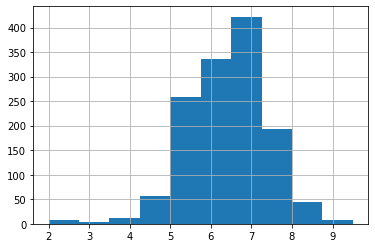

In [24]:
earthquakes['magnitude_num'].hist();
#gdp_and_internet_use_2014.plot(kind='scatter', x="Internet_Users_Pct", y='Log_GDP_Per_Capita');
#gdp_2014['GDP_Per_Capita'].hist(bins = 25);

In [26]:
earthquakes['magnitude_num'].describe()

count    1338.000000
mean        6.399178
std         0.967431
min         2.000000
25%         5.700000
50%         6.400000
75%         7.100000
max         9.500000
Name: magnitude_num, dtype: float64